# **TCS Stock Price Forcasting using Time Series Analysis**


---






# Introduction

Stock price forecasting presents a complex challenge that demands sophisticated analytical tools. This project focuses on **developing a predictive model for Tata Consultancy Services _(NSE:TCS)_**, using historical data and time series analysis techniques. By systematically assessing past trends, **the model seeks to generate reliable stock price projections**, offering valuable insights for investors and financial analysts operating within the context of TCS investments.

Designed with a focus on practicality, this tool emphasizes the generation of actionable insights. The model's output will serve to identify potential opportunities, facilitate risk assessment, and guide investment strategies specifically related to TCS stock movements. The primary aim is to produce predictions that promote data-driven decision-making, support informed risk management practices, and enhance potential returns in a dynamic market environment. This project highlights the importance of rigor and clarity in predictive modeling, ultimately contributing to greater understanding of stock price behavior.

For the scope of this class and time limitations, we worked mainly with the TCS dataset. The
dataset consists of recordings from 1/1/2025 to 12/31/2015 timeline.

*The dataset from this project can be found on [Kaggle](https://www.kaggle.com/datasets/atulanandjha/national-stock-exchange-time-series/data)*

#Data Exploration

In [ ]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#importing dataset
tcs = pd.read_csv("tcs_stock.csv")

Data Card

Detailed explanation of these columns is as follows:
1. Date: Data on which the data is recorded
2. Symbol: NSE symbol of the stock
3. Series: Series of the stock
4. Prev Close: Last day close point
5. Open: Current day open point
6. High: Current day highest point
7. Low: Current day lowest point
8. Last: the final quoted trading price for a stock during the most recent day of trading
9. Close: Closing point of the current day
10. VWAP: volume-weighted average price is the ratio of the value traded to total volume
traded over a particular time horizon
11. Volume: the amount of a security that was traded during a given period. For every buyer,
there is a seller, and each transaction contributes to the count of total volume.
12. Turnover: Total Turnover of the stock till that day
13. Trades: Number of buy or Sell of the stock.
14. Deliverable Volume: The number of shares that move from one set of people (who had
those shares in their demat account before today and are selling today) to another set of
people (who have purchased those shares and will get those shares by T+2 days in their
demat account).
15. %Deliverable: percentage deliverables of that stock
Figure

In [ ]:
tcs

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,TCS,EQ,2558.25,2567.00,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
1,2015-01-02,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2,2015-01-05,TCS,EQ,2579.45,2581.00,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
3,2015-01-06,TCS,EQ,2540.25,2529.10,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
4,2015-01-07,TCS,EQ,2446.60,2470.00,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2015-12-24,TCS,EQ,2425.80,2421.00,2438.20,2404.00,2435.00,2434.25,2424.03,421580,1.021924e+14,21932,188670,0.4475
244,2015-12-28,TCS,EQ,2434.25,2428.00,2466.40,2420.20,2456.95,2462.70,2455.00,1852099,4.546896e+14,43390,1060100,0.5724
245,2015-12-29,TCS,EQ,2462.70,2458.35,2465.30,2445.75,2449.35,2455.80,2452.26,854262,2.094875e+14,26975,433986,0.5080
246,2015-12-30,TCS,EQ,2455.80,2453.05,2459.00,2412.30,2421.70,2418.30,2442.06,802881,1.960682e+14,49464,632180,0.7874


In [ ]:
tcs.head() #print fist 5 rows

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


In [ ]:
#checking number of rows and columns
print(tcs)

           Date Symbol Series  Prev Close     Open     High      Low     Last  \
0    2015-01-01    TCS     EQ     2558.25  2567.00  2567.00  2541.00  2550.00   
1    2015-01-02    TCS     EQ     2545.55  2551.00  2590.95  2550.60  2588.40   
2    2015-01-05    TCS     EQ     2579.45  2581.00  2599.90  2524.65  2538.10   
3    2015-01-06    TCS     EQ     2540.25  2529.10  2529.10  2440.00  2450.05   
4    2015-01-07    TCS     EQ     2446.60  2470.00  2479.15  2407.45  2426.90   
..          ...    ...    ...         ...      ...      ...      ...      ...   
243  2015-12-24    TCS     EQ     2425.80  2421.00  2438.20  2404.00  2435.00   
244  2015-12-28    TCS     EQ     2434.25  2428.00  2466.40  2420.20  2456.95   
245  2015-12-29    TCS     EQ     2462.70  2458.35  2465.30  2445.75  2449.35   
246  2015-12-30    TCS     EQ     2455.80  2453.05  2459.00  2412.30  2421.70   
247  2015-12-31    TCS     EQ     2418.30  2415.75  2448.50  2407.50  2430.00   

       Close     VWAP   Vol

In [ ]:
#checking null values
tcs.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [ ]:
#checking statistics of dataset
tcs.describe().T

,count,mean,std,min,25%,50%,75%,max
Prev Close,248.0,2.538207e+03,8.682936e+01,2.319800e+03,2.495312e+03,2.543050e+03,2.592000e+03,2.776000e+03
Open,248.0,2.542173e+03,8.760570e+01,2.319400e+03,2.499500e+03,2.548500e+03,2.594250e+03,2.788000e+03
High,248.0,2.563580e+03,9.059837e+01,2.343900e+03,2.518900e+03,2.566000e+03,2.615750e+03,2.812100e+03
Low,248.0,2.514408e+03,8.295278e+01,2.315250e+03,2.472100e+03,2.520000e+03,2.567300e+03,2.721900e+03
Last,248.0,2.538040e+03,8.684931e+01,2.321000e+03,2.497500e+03,2.540150e+03,2.593425e+03,2.785100e+03
Close,248.0,2.537718e+03,8.705781e+01,2.319800e+03,2.495150e+03,2.541475e+03,2.592000e+03,2.776000e+03
VWAP,248.0,2.538432e+03,8.681305e+01,2.322270e+03,2.496665e+03,2.540445e+03,2.592608e+03,2.763040e+03
Volume,248.0,1.172296e+06,6.220635e+05,6.758200e+04,7.821352e+05,1.031024e+06,1.393266e+06,4.834371e+06
Turnover,248.0,2.977489e+14,1.576443e+14,1.667550e+13,1.950716e+14,2.631783e+14,3.550390e+14,1.206435e+15
Trades,248.0,6.687361e+04,2.888291e+04,5.197000e+03,4.547625e+04,6.144950e+04,8.206675e+04,2.112470e+05


In [ ]:
#checking columns and column type
tcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                248 non-null    object 
 1   Symbol              248 non-null    object 
 2   Series              248 non-null    object 
 3   Prev Close          248 non-null    float64
 4   Open                248 non-null    float64
 5   High                248 non-null    float64
 6   Low                 248 non-null    float64
 7   Last                248 non-null    float64
 8   Close               248 non-null    float64
 9   VWAP                248 non-null    float64
 10  Volume              248 non-null    int64  
 11  Turnover            248 non-null    float64
 12  Trades              248 non-null    int64  
 13  Deliverable Volume  248 non-null    int64  
 14  %Deliverble         248 non-null    float64
dtypes: float64(9), int64(3), object(3)
memory usage: 29.2+ KB

In [ ]:
tcs.Series.value_counts() #no other value besides EQ in Series

Series
EQ    248
Name: count, dtype: int64

In [ ]:
tcs.Symbol.value_counts() #no other value besides TCS in Sybmol

Symbol
TCS    248
Name: count, dtype: int64

In [ ]:
#converting date
tcs['Date'] = pd.to_datetime(tcs['Date'])
tcs = tcs.sort_values('Date')

# Data Visuzaliation

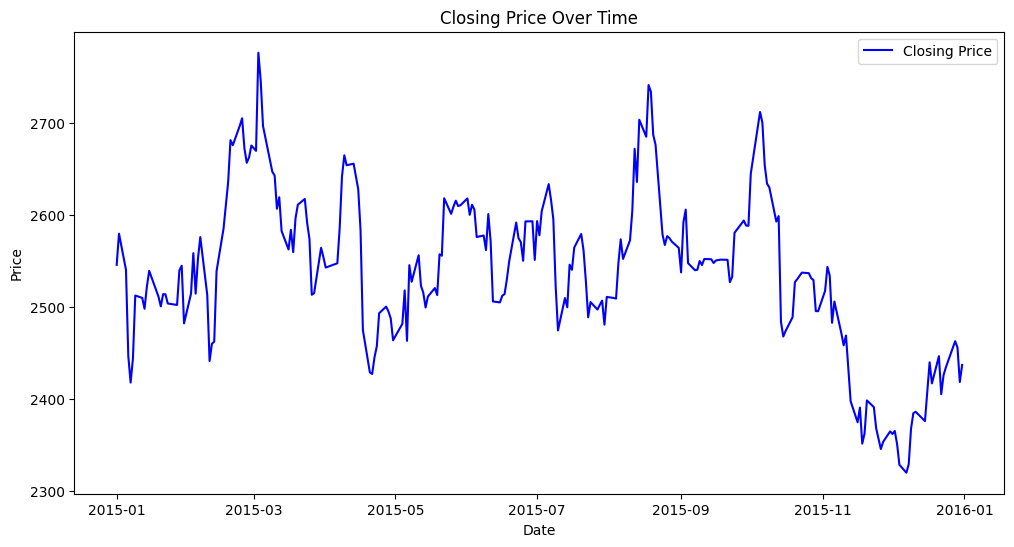

In [ ]:
#print closing price across date
#it is interesting to note the closing price point drops closer to year end

plt.figure(figsize=(12, 6))
plt.plot(tcs['Date'], tcs['Close'], label='Closing Price', color='blue')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Price Over Time')
plt.legend()

plt.show()

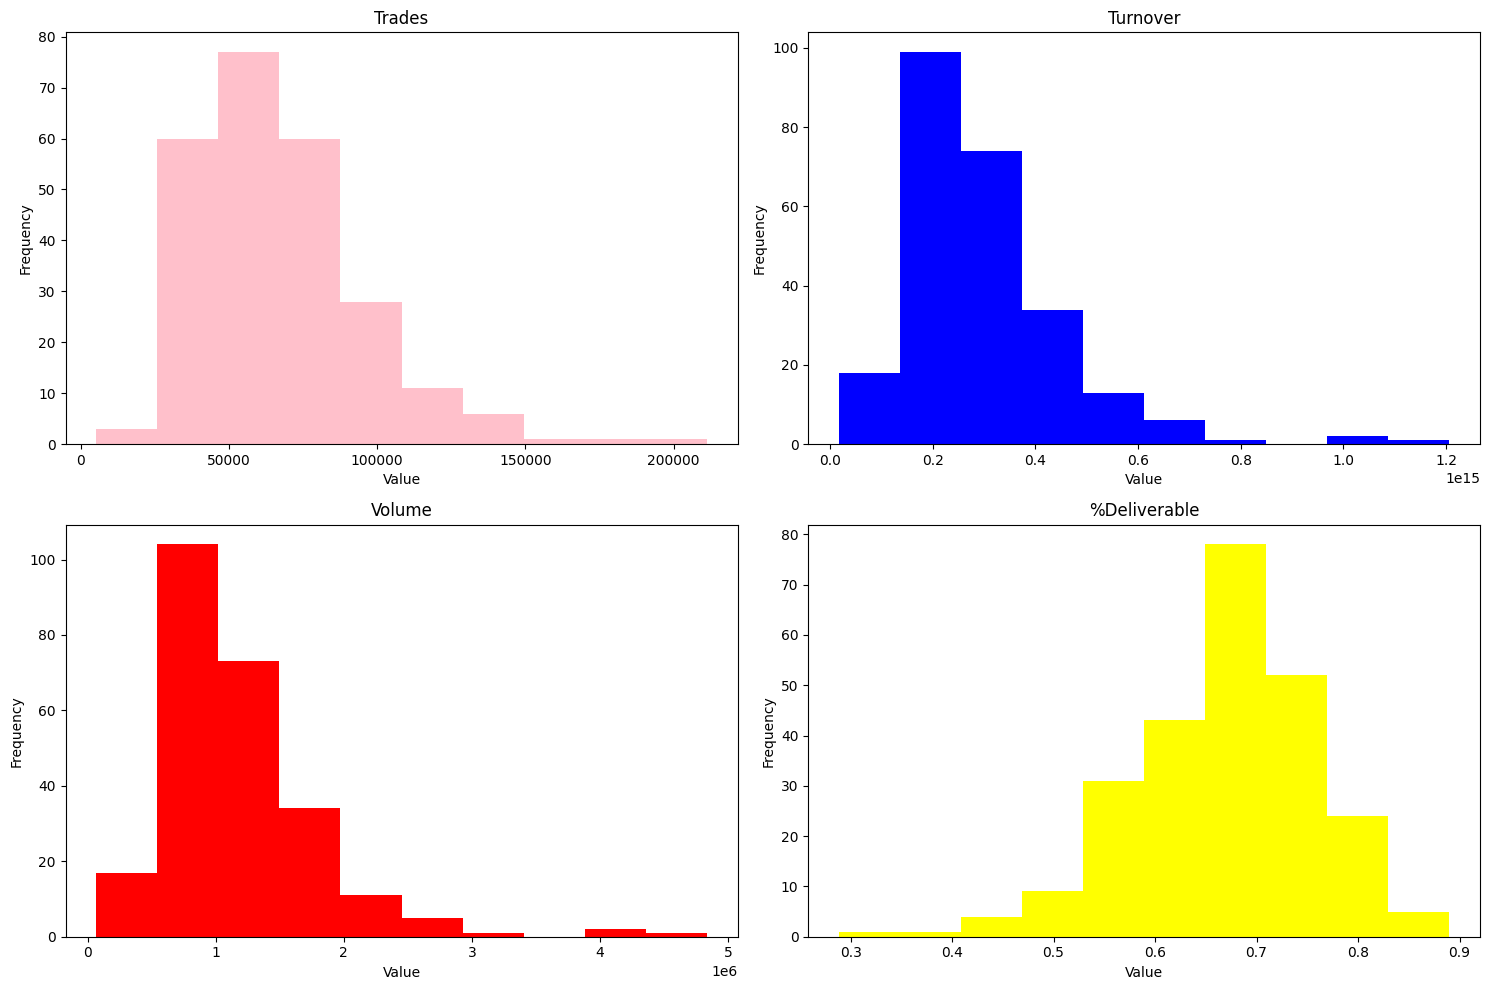

In [ ]:
#plot histograms for trades, turnover, volume, %deliverable in on graph

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0 ,0].hist(tcs['Trades'], color='pink')
ax[0, 0].set_title('Trades')
ax[0, 0].set_xlabel('Value')
ax[0, 0].set_ylabel('Frequency')

ax[0, 1].hist(tcs['Turnover'], color='blue')
ax[0, 1].set_title('Turnover')
ax[0, 1].set_xlabel('Value')
ax[0, 1].set_ylabel('Frequency')

ax[1, 0].hist(tcs['Volume'], color='red')
ax[1, 0].set_title('Volume')
ax[1, 0].set_xlabel('Value')
ax[1, 0].set_ylabel('Frequency')

ax[1, 1].hist(tcs['%Deliverble'], color='yellow')
ax[1, 1].set_title('%Deliverable')
ax[1, 1].set_xlabel('Value')
ax[1, 1].set_ylabel('Frequency')

plt.tight_layout()

# Display the plot
plt.show()

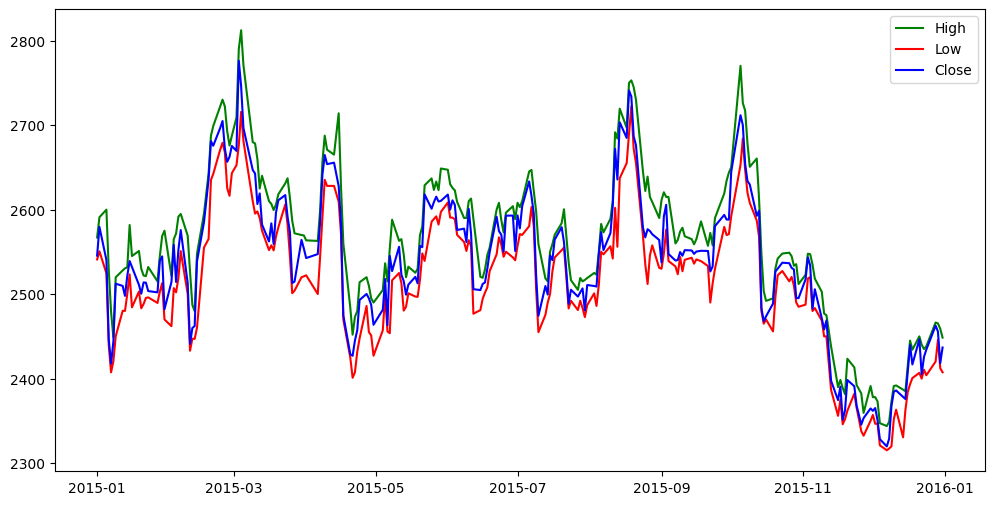

In [ ]:
plt.figure(figsize=(12, 6))
prev = plt.plot(tcs['Date'],tcs["High"], color='green',label='High')
low = plt.plot(tcs['Date'],tcs["Low"], color='red', label='Low')
close = plt.plot(tcs['Date'],tcs["Close"], color='blue', label='Close')

plt.legend()
plt.show()

#Models


## **Neural Network - LSTM Model**

In [ ]:
#converting date to datetime stamp

tcs["Date"]=pd.to_datetime(tcs.Date,format="%Y-%m-%d")

In [ ]:
#Data Types: Most of the columns in the dataset are numerical, specifically integer or float values. A few of them are categorical and hence show “object” as their data type.
tcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                248 non-null    datetime64[ns]
 1   Symbol              248 non-null    object        
 2   Series              248 non-null    object        
 3   Prev Close          248 non-null    float64       
 4   Open                248 non-null    float64       
 5   High                248 non-null    float64       
 6   Low                 248 non-null    float64       
 7   Last                248 non-null    float64       
 8   Close               248 non-null    float64       
 9   VWAP                248 non-null    float64       
 10  Volume              248 non-null    int64         
 11  Turnover            248 non-null    float64       
 12  Trades              248 non-null    int64         
 13  Deliverable Volume  248 non-null    int64         

In [ ]:
#setting date as index
tcs.index=tcs['Date']
tcs

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,TCS,EQ,2558.25,2567.00,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
2015-01-02,2015-01-02,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2015-01-05,2015-01-05,TCS,EQ,2579.45,2581.00,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
2015-01-06,2015-01-06,TCS,EQ,2540.25,2529.10,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
2015-01-07,2015-01-07,TCS,EQ,2446.60,2470.00,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-24,2015-12-24,TCS,EQ,2425.80,2421.00,2438.20,2404.00,2435.00,2434.25,2424.03,421580,1.021924e+14,21932,188670,0.4475
2015-12-28,2015-12-28,TCS,EQ,2434.25,2428.00,2466.40,2420.20,2456.95,2462.70,2455.00,1852099,4.546896e+14,43390,1060100,0.5724
2015-12-29,2015-12-29,TCS,EQ,2462.70,2458.35,2465.30,2445.75,2449.35,2455.80,2452.26,854262,2.094875e+14,26975,433986,0.5080


In [ ]:
#dropping all other columns except Close which is the dependent variable
data = tcs.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
dataset

array([[2545.55],
       [2579.45],
       [2540.25],
       [2446.6 ],
       [2417.7 ],
       [2443.8 ],
       [2512.3 ],
       [2509.7 ],
       [2497.9 ],
       [2521.95],
       [2539.1 ],
       [2532.15],
       [2511.  ],
       [2500.45],
       [2513.8 ],
       [2513.55],
       [2503.6 ],
       [2502.05],
       [2539.6 ],
       [2544.65],
       [2482.05],
       [2514.2 ],
       [2558.25],
       [2514.3 ],
       [2552.4 ],
       [2575.75],
       [2512.9 ],
       [2441.15],
       [2459.9 ],
       [2462.15],
       [2538.75],
       [2584.8 ],
       [2635.65],
       [2681.05],
       [2675.55],
       [2696.65],
       [2704.75],
       [2672.2 ],
       [2656.45],
       [2662.35],
       [2675.25],
       [2669.4 ],
       [2776.  ],
       [2746.  ],
       [2696.45],
       [2646.8 ],
       [2642.7 ],
       [2606.55],
       [2619.05],
       [2582.35],
       [2562.3 ],
       [2583.7 ],
       [2559.35],
       [2596.25],
       [2610.95],
       [26

In [ ]:
# #The RNN model was trained on normalized data. Normalizing the dataset is important since this brings the features or columns to a similar scale.
# Sometimes the model may be sensitive to differences in range of features.
# This will cause the larger scale features to dominate the learning of the model, thereby compromising the model’s objective.
# Normalizing the data removes any biases, hence this can improve the model’s performance.
# There are different techniques to normalize your data, however, this dataset was normalized using MinMaxScaler

# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.49484875],
       [0.56915826],
       [0.48323104],
       [0.27794827],
       [0.21459886],
       [0.27181061],
       [0.42196405],
       [0.4162648 ],
       [0.39039895],
       [0.44311705],
       [0.48071021],
       [0.46547567],
       [0.41911442],
       [0.3959886 ],
       [0.42525208],
       [0.42470408],
       [0.40289347],
       [0.39949584],
       [0.48180623],
       [0.49287593],
       [0.35565541],
       [0.42612889],
       [0.52268742],
       [0.42634809],
       [0.50986409],
       [0.56104779],
       [0.42327926],
       [0.26600175],
       [0.30710215],
       [0.3120342 ],
       [0.47994301],
       [0.58088558],
       [0.69234985],
       [0.7918676 ],
       [0.77981149],
       [0.82606313],
       [0.8438185 ],
       [0.77246822],
       [0.73794388],
       [0.75087681],
       [0.77915388],
       [0.76633056],
       [1.        ],
       [0.93423937],
       [0.82562473],
       [0.71679088],
       [0.70780359],
       [0.628

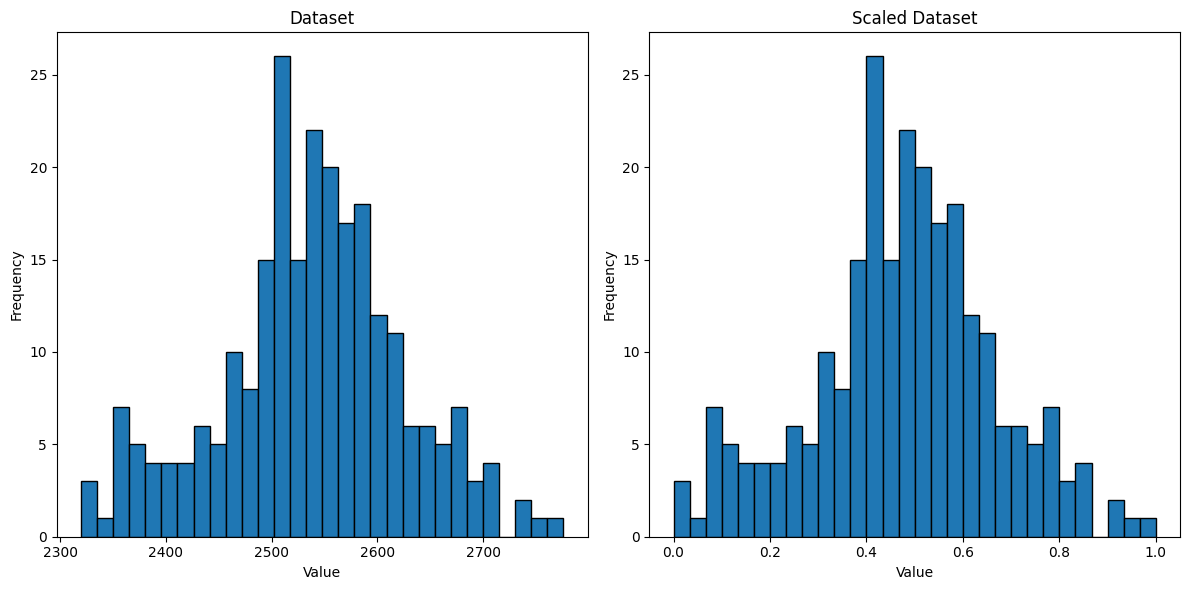

In [ ]:
#Notice the x-axis in Figure the data remains the same, however, the range of the data changes, and now all values lie between 0 and 1.
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histograms
axs[0].hist(data, bins=30, edgecolor='black')
axs[0].set_title('Dataset')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

axs[1].hist(scaled_data, bins=30, edgecolor='black')
axs[1].set_title('Scaled Dataset')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

The objective of the RNN model is to predict the closing price ahead of time, in other words, the
model requires “Close” as an input to learn from historical data. In addition to normalizing the
data, it was also transformed into univariate data i.e., data that consists of
observations based on a single characteristic. The “Date” column was set as the index and the
single column, in this case, “Close” is processed to generate dependent and independent
variables.

In [ ]:
#train and test size
train_size = int(len(scaled_data) * 0.75)
print(train_size)
test_size = len(scaled_data) - train_size
print(test_size)

186
62


In [ ]:
#dividing the dataset
train, test = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]
print(len(train), len(test))

186 62


In [ ]:
#preprocessing the time series data

train_data = scaled_data[0:int(train_size), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.49484875, 0.56915826, 0.48323104, 0.27794827, 0.21459886,
       0.27181061, 0.42196405, 0.4162648 , 0.39039895, 0.44311705,
       0.48071021, 0.46547567, 0.41911442, 0.3959886 , 0.42525208,
       0.42470408, 0.40289347, 0.39949584, 0.48180623, 0.49287593,
       0.35565541, 0.42612889, 0.52268742, 0.42634809, 0.50986409,
       0.56104779, 0.42327926, 0.26600175, 0.30710215, 0.3120342 ,
       0.47994301, 0.58088558, 0.69234985, 0.7918676 , 0.77981149,
       0.82606313, 0.8438185 , 0.77246822, 0.73794388, 0.75087681,
       0.77915388, 0.76633056, 1.        , 0.93423937, 0.82562473,
       0.71679088, 0.70780359, 0.62856203, 0.6559623 , 0.57551512,
       0.5315651 , 0.57847435, 0.52509864, 0.60598422, 0.63820693,
       0.65179746, 0.59513371, 0.55666374, 0.42371767, 0.4274441 ])]
[0.5356203419552834]

[array([0.49484875, 0.56915826, 0.48323104, 0.27794827, 0.21459886,
       0.27181061, 0.42196405, 0.4162648 , 0.39039895, 0.44311705,
       0.48071021, 0.46547567, 0.419

In [ ]:
test_data = scaled_data[train_size - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[train_size:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
print(x_train), print(y_train)

[[[0.49484875]
  [0.56915826]
  [0.48323104]
  ...
  [0.55666374]
  [0.42371767]
  [0.4274441 ]]

 [[0.56915826]
  [0.48323104]
  [0.27794827]
  ...
  [0.42371767]
  [0.4274441 ]
  [0.53562034]]

 [[0.48323104]
  [0.27794827]
  [0.21459886]
  ...
  [0.4274441 ]
  [0.53562034]
  [0.51326173]]

 ...

 [[0.59907935]
  [0.56543183]
  [0.62275318]
  ...
  [0.50690487]
  [0.45374836]
  [0.46657168]]

 [[0.56543183]
  [0.62275318]
  [0.6871986 ]
  ...
  [0.45374836]
  [0.46657168]
  [0.57124068]]

 [[0.62275318]
  [0.6871986 ]
  [0.64982464]
  ...
  [0.46657168]
  [0.57124068]
  [0.60039456]]]
[0.53562034 0.51326173 0.48849189 0.49868479 0.58132398 0.70495397
 0.75569925 0.73202543 0.73586146 0.67503288 0.57650153 0.33987286
 0.23893029 0.23509426 0.27466024 0.30129329 0.37976765 0.3954406
 0.38404209 0.36716352 0.31543183 0.3545594  0.43412977 0.31400701
 0.49419114 0.45473477 0.51775537 0.44519947 0.42875932 0.39335818
 0.41944323 0.43971942 0.42284086 0.52005699 0.51665936 0.65344147
 0.61

(None, None)

In [ ]:
print(x_test), print(y_test)

[[[0.6871986 ]
  [0.64982464]
  [0.60346339]
  ...
  [0.57124068]
  [0.60039456]
  [0.58844805]]

 [[0.64982464]
  [0.60346339]
  [0.44432267]
  ...
  [0.60039456]
  [0.58844805]
  [0.58800964]]

 [[0.60346339]
  [0.44432267]
  [0.33877685]
  ...
  [0.58844805]
  [0.58800964]
  [0.71196843]]

 ...

 [[0.58844805]
  [0.58800964]
  [0.71196843]
  ...
  [0.23235423]
  [0.25087681]
  [0.31323981]]

 [[0.58800964]
  [0.71196843]
  [0.85894345]
  ...
  [0.25087681]
  [0.31323981]
  [0.29811486]]

 [[0.71196843]
  [0.85894345]
  [0.8334064 ]
  ...
  [0.31323981]
  [0.29811486]
  [0.21591407]]]
[[2588.05]
 [2644.6 ]
 [2711.65]
 [2700.  ]
 [2653.95]
 [2633.8 ]
 [2629.65]
 [2592.6 ]
 [2598.55]
 [2483.7 ]
 [2467.75]
 [2473.75]
 [2488.75]
 [2526.75]
 [2530.  ]
 [2537.15]
 [2536.55]
 [2531.1 ]
 [2529.1 ]
 [2495.35]
 [2495.2 ]
 [2517.35]
 [2543.45]
 [2533.8 ]
 [2482.65]
 [2505.75]
 [2471.35]
 [2458.15]
 [2468.8 ]
 [2397.4 ]
 [2374.6 ]
 [2390.55]
 [2351.45]
 [2362.55]
 [2398.35]
 [2391.05]
 [2367.95]

(None, None)

The X_train which is the independent variable for the training set has a size of (126, 60, 1)
indicating 126 records (because 186 - 60 = 126) of 60 sequences. However, the y_train which is
the dependent variable is of size (126,).

In [ ]:
x_train.shape #indepdenet train variable

(126, 60, 1)

In [ ]:
y_train.shape #depdenet train variable

(126,)

In [ ]:
x_test.shape #indepdenet test variable

(62, 60, 1)

In [ ]:
y_test.shape #depdenet test variable

(62, 1)

In [ ]:
#we input the steps and features as input size in neural network
(x_train.shape[1], 1)

(60, 1)

The model consists of LSTM layers that accept a tensor with an input shape of (60, 1) and
Dense layers. The hidden layers use a ReLu activation function however because this is a
regression problem, the output layer does not have any activation function. The model uses the
Adam compiler and mean squared error as the loss function. The model does not monitor any
other metrics during training.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#adding two hidden and one output layer
model = Sequential()
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(128, activation='relu', return_sequences=False))
model.add(Dense(1)) #no activation func. because regression problem
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 198273 (774.50 KB)
Trainable params: 198273 (774.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size = 1, verbose=1) #training the model

Epoch 1/20
126/126 [==============================] - 5s 27ms/step - loss: 0.0353
Epoch 2/20
126/126 [==============================] - 3s 27ms/step - loss: 0.0168
Epoch 3/20
126/126 [==============================] - 3s 27ms/step - loss: 0.0143
Epoch 4/20
126/126 [==============================] - 3s 27ms/step - loss: 0.0145
Epoch 5/20
126/126 [==============================] - 3s 27ms/step - loss: 0.0136
Epoch 6/20
126/126 [==============================] - 3s 25ms/step - loss: 0.0116
Epoch 7/20
126/126 [==============================] - 3s 26ms/step - loss: 0.0100
Epoch 8/20
126/126 [==============================] - 3s 26ms/step - loss: 0.0092
Epoch 9/20
126/126 [==============================] - 3s 26ms/step - loss: 0.0095
Epoch 10/20
126/126 [==============================] - 3s 25ms/step - loss: 0.0085
Epoch 11/20
126/126 [==============================] - 3s 26ms/step - loss: 0.0082
Epoch 12/20
126/126 [==============================] - 3s 26ms/step - loss: 0.0072
Epoch 13/20
1

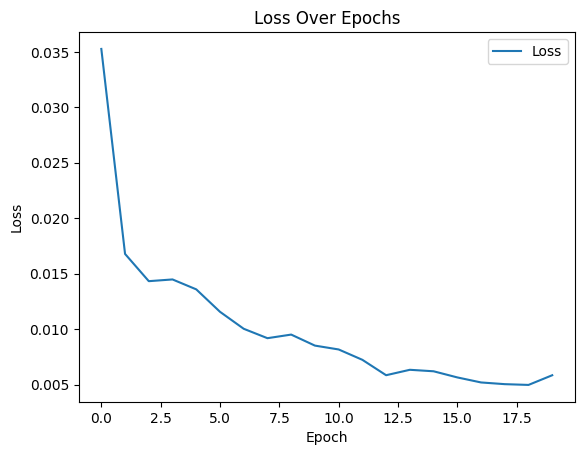

In [ ]:
#plotting model loss
loss = history.history["loss"]
plt.plot(loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 0s 37ms/step


In [ ]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

Predictive Insights: The predictions somewhat overlapped with the y_test initially however the
model was unable to make accurate predictions for the future dates. This could be due to
several reasons, however it should be noted that the trend of close price was abnormal towards
the end of the year, it dropped abruptly between October 2015 to December 2015. Since this
pattern was different from the historical data that the model was trained on, it may be unable to
predict a close price that is way off the previous data. Although the predictions did show a drop
they still could not predict below a certain close price limit. The model can be retrained on a
larger dataset (more years) to understand the close price pattern towards the end of the year.

In [ ]:
#generating metrics on model's performance on test set
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(rmse)
print(mse)
print(mae)
print(mape)
print(r2)

50.24995841343241
2525.0583205516864
41.40550340221775
0.017040799451613697
0.7284562971648378


In [ ]:
#printing predictions from the model made on x_test
predictions

array([[2576.2642],
       [2569.5093],
       [2605.1372],
       [2668.972 ],
       [2672.5298],
       [2614.4685],
       [2577.5261],
       [2576.9453],
       [2559.321 ],
       [2561.3599],
       [2498.0552],
       [2468.7332],
       [2469.2744],
       [2482.3733],
       [2510.0781],
       [2526.0535],
       [2533.4783],
       [2532.918 ],
       [2527.5093],
       [2524.0024],
       [2504.6082],
       [2498.0696],
       [2510.4238],
       [2532.839 ],
       [2536.375 ],
       [2504.5347],
       [2503.3857],
       [2490.0193],
       [2479.2747],
       [2481.442 ],
       [2456.6313],
       [2439.4639],
       [2435.467 ],
       [2426.7156],
       [2423.9446],
       [2431.3516],
       [2435.3647],
       [2432.465 ],
       [2425.9128],
       [2423.0918],
       [2424.0781],
       [2424.755 ],
       [2426.0056],
       [2424.148 ],
       [2419.1587],
       [2414.4526],
       [2412.6313],
       [2418.7393],
       [2427.4717],
       [2433.7065],


Model Evaluation: The trained model was evaluated by making predictions on the test set which
comprises 25% of the dataset i.e., 62 records. The x_test of size (62, 60, 1) indicates 62 records
of 60 sequences. The predictions returned by x_test were plotted against y_test (represented by
Val) to provide a visual comparison of how far off the values were.

<ipython-input-25-2b2d45a4ca88>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


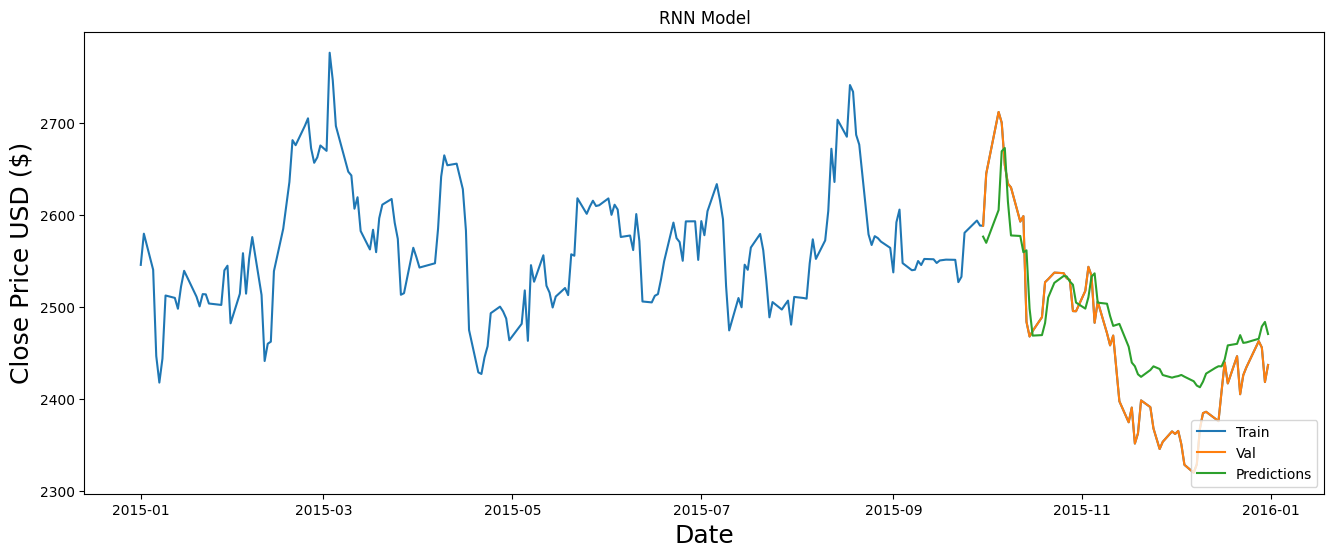

In [ ]:
import matplotlib.pyplot as plt

# Plot the data
train = data[:train_size]
test = data[train_size:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('RNN Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(tcs['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right') #val is the actual data points (y_test) and prediction is the result we got from x_test
plt.show()

In [ ]:
#comparing actual close (y_test) to predictions made
test

,Close,Predictions
Date,,
2015-09-30,2588.05,2576.264160
2015-10-01,2644.60,2569.509277
2015-10-05,2711.65,2605.137207
2015-10-06,2700.00,2668.971924
2015-10-07,2653.95,2672.529785
...,...,...
2015-12-24,2434.25,2461.331787
2015-12-28,2462.70,2465.318848
2015-12-29,2455.80,2478.620850


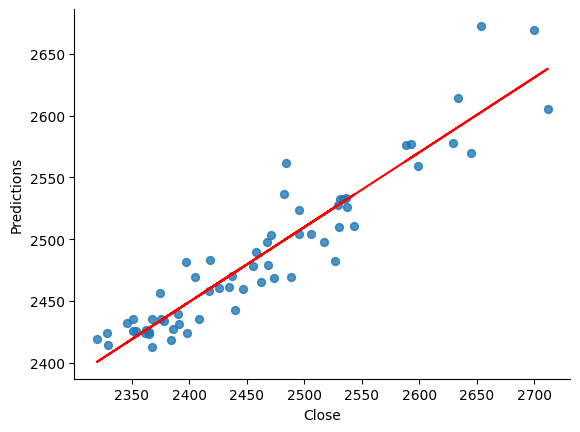

In [ ]:
# @title Close vs Predictions
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
model = LinearRegression()b
model.fit(test[['Close']], test['Predictions'])
test.plot(kind='scatter', x='Close', y='Predictions', s=32, alpha=.8)
plt.plot(test['Close'], model.predict(test[['Close']]), color='red')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()